### 1. Objective

The goal of this notebook is to understand the data that we have and to prepare it for the modelling. For that to happen, we must understand the features data that we have and identify usefullness of them to identify consumers who have churned.

#### 1.1. Steps

1. Import the libraries and dataset
2. Understand the data
3. Data cleaning, if needed.
4. Exploratory data analysis
5. Export the dataset to modelling

In [1]:
# Data Manipulation
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset_churn.csv')

# Unnecessary features
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace=True)

### 2. Understanding the Data

In [3]:
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1688,711226758,Existing Customer,51,F,1,College,Divorced,Less than $40K,Blue,42,3,2,3,4002.0,1669,2333.0,0.702,2024,53,1.120,0.417
3181,709914858,Existing Customer,48,F,2,Graduate,Married,Less than $40K,Blue,36,4,1,2,6362.0,1705,4657.0,0.644,5169,84,0.474,0.268
10082,788230158,Existing Customer,29,M,1,Unknown,Married,$40K - $60K,Silver,20,3,1,2,16496.0,1409,15087.0,0.677,16715,126,0.703,0.085
2281,714062958,Existing Customer,36,M,4,Unknown,Single,$40K - $60K,Blue,36,6,1,2,9887.0,994,8893.0,0.488,2552,64,0.455,0.101
1349,778426608,Existing Customer,52,M,4,Graduate,Married,$80K - $120K,Blue,32,4,3,3,1438.3,702,736.3,0.805,1805,53,0.606,0.488


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Data Dictionary

- CLIENTNUM: Client ID. Categorical nominal.
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.
- Customer_Age: Demographic variable - Customer's Age in Years. Numerical discrete.
- Gender: Demographic variable - M=Male, F=Female. Categorical nominal.
- Dependent_count: Demographic variable - Number of dependents. Numerical discrete.
- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.
- Income_Category: Demographic variable - Annual Income Category of the account holder (<40K - 60K, 80K, 120K, >120K). Categorical ordinal.
- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.
- Months_on_book: Period of relationship with bank. Numerical discrete.
- Total_Relationship_Count: Total no. of products held by the customer. Numerical discrete.
- Months_Inactive_12_mon: No. of months inactive in the last 12 months. Numerical discrete.
- Contacts_Count_12_mon: No. of Contacts in the last 12 months. Numerical discrete.
- Credit_Limit: Credit Limit on the Credit Card. Numerical continuous.
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card. Numerical discrete.
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months). Numerical continuous.
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1). Numerical continuous.
- Total_Trans_Amt: Total Transaction Amount (Last 12 months). Numerical discrete.
- Total_Trans_Ct: Total Transaction Count (Last 12 months). Numerical discrete.
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1). Numerical continuous.
- Avg_Utilization_Ratio: Average Card Utilization Ratio. Numerical continuous.

Let's see if there're some null or duplicated values.

In [5]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.duplicated().sum()

0

We don't have any null or duplicated rows.

## 3. Exploratory Data Analysis (EDA)

#### Support Functions

In [7]:
def analysis_plots(
    data,
    features,
    histplot=True,
    countplot=False,
    barplot=False,
    barplot_y=None,
    various_barplots=False,
    barplot_x=None,
    boxplot=False,
    boxplot_x=None,
    outliers=False,
    kde=False,
    hue=None,
    palette=None,
    figsize=(24, 12),
    style="whitegrid",
):
    try:
        sns.set_theme(style=style)
        num_features = len(features)
        num_rows = num_features // 3 + (num_features % 3 > 0)

        fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

        for i, feature in enumerate(features):
            row = i // 3
            col = i % 3

            ax = axes[row, col] if num_rows > 1 else axes[col]

            if countplot:
                sns.countplot(data=data, x=feature, hue=hue, ax=ax, palette=palette)
                for container in ax.containers:
                    ax.bar_label(container)

            elif barplot:
                ax = sns.barplot(
                    data=data,
                    x=feature,
                    y=barplot_y,
                    hue=hue,
                    ax=ax,
                    ci=None,
                    palette=palette,
                )
                for container in ax.containers:
                    ax.bar_label(container)

            elif various_barplots:
                ax = sns.barplot(
                    data=data,
                    x=barplot_x,
                    y=feature,
                    hue=hue,
                    ax=ax,
                    ci=None,
                    palette=palette,
                )
                for container in ax.containers:
                    ax.bar_label(container)

            elif boxplot:
                sns.boxplot(
                    data=data,
                    x=boxplot_x,
                    y=feature,
                    showfliers=outliers,
                    ax=ax,
                    palette=palette,
                )

            elif outliers:
                sns.boxplot(data=data, x=feature, ax=ax, palette=palette)

            else:
                sns.histplot(
                    data=data, x=feature, hue=hue, kde=kde, ax=ax, palette=palette
                )

            ax.set_title(feature)
            ax.set_xlabel("")

        if num_features < len(axes.flat):
            for j in range(num_features, len(axes.flat)):
                fig.delaxes(axes.flat[j])

        plt.tight_layout()

    except Exception as e:
        raise CustomException(e, sys)

In [8]:
def check_outliers(data, features, verbose=True):
    try:
        outlier_counts = {}
        outlier_indexes = {}
        total_outliers = 0

        for feature in features:
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            feature_outliers = data[
                (data[feature] < lower_bound) | (data[feature] > upper_bound)
            ]
            outlier_indexes[feature] = feature_outliers.index.tolist()
            outlier_count = len(feature_outliers)
            outlier_counts[feature] = outlier_count
            total_outliers += outlier_count

        if verbose:
            print(f"There are {total_outliers} outliers in the dataset.")
            print()
            print(f"Number (percentage) of outliers per feature: ")
            print()
            for feature, count in outlier_counts.items():
                print(f"{feature}: {count} ({round(count/len(data)*100, 2)})%")

        return outlier_indexes, outlier_counts, total_outliers

    except Exception as e:
        raise CustomException(e, sys)

#### Feature Engineering to Visualization

In [9]:
df.columns = [x.lower() for x in df.columns]

In [10]:
# drop id
df2 = df.drop(['clientnum'], axis=1)

### Target

Our target variable is the column called "Attrition Flag". A value of "Existing Customer" indicates no churn and a value of "Attrited Customer" shows churn. 

As a result, the goal of our model is to forecast the right value (Existing Customer or Attrited Customer) for every consumer in the "Attrition Flag" column.

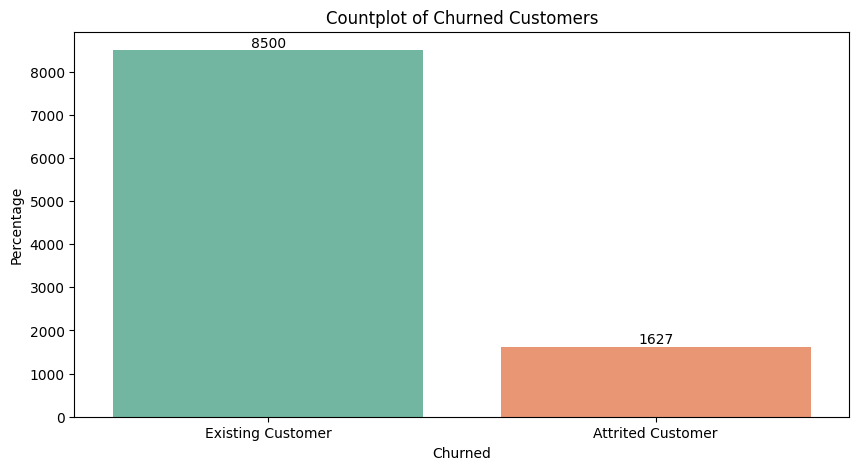

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='attrition_flag', data=df, palette="Set2", stat='count')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Countplot of Churned Customers')
ax.set_xlabel('Churned')
ax.set_ylabel('Percentage')
plt.show()

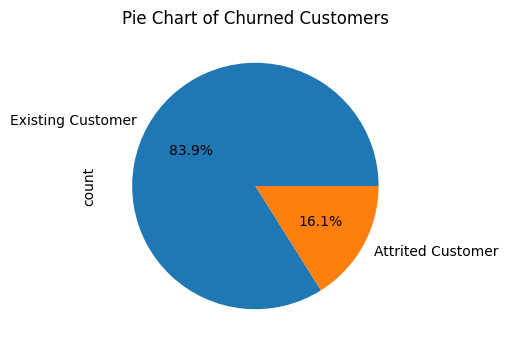

In [16]:
df['attrition_flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
plt.title('Pie Chart of Churned Customers')
plt.show()

### Categorical Features


In [17]:
cat_cols = df2.select_dtypes(include="object").columns.to_list()
cat_cols

['attrition_flag',
 'gender',
 'education_level',
 'marital_status',
 'income_category',
 'card_category']

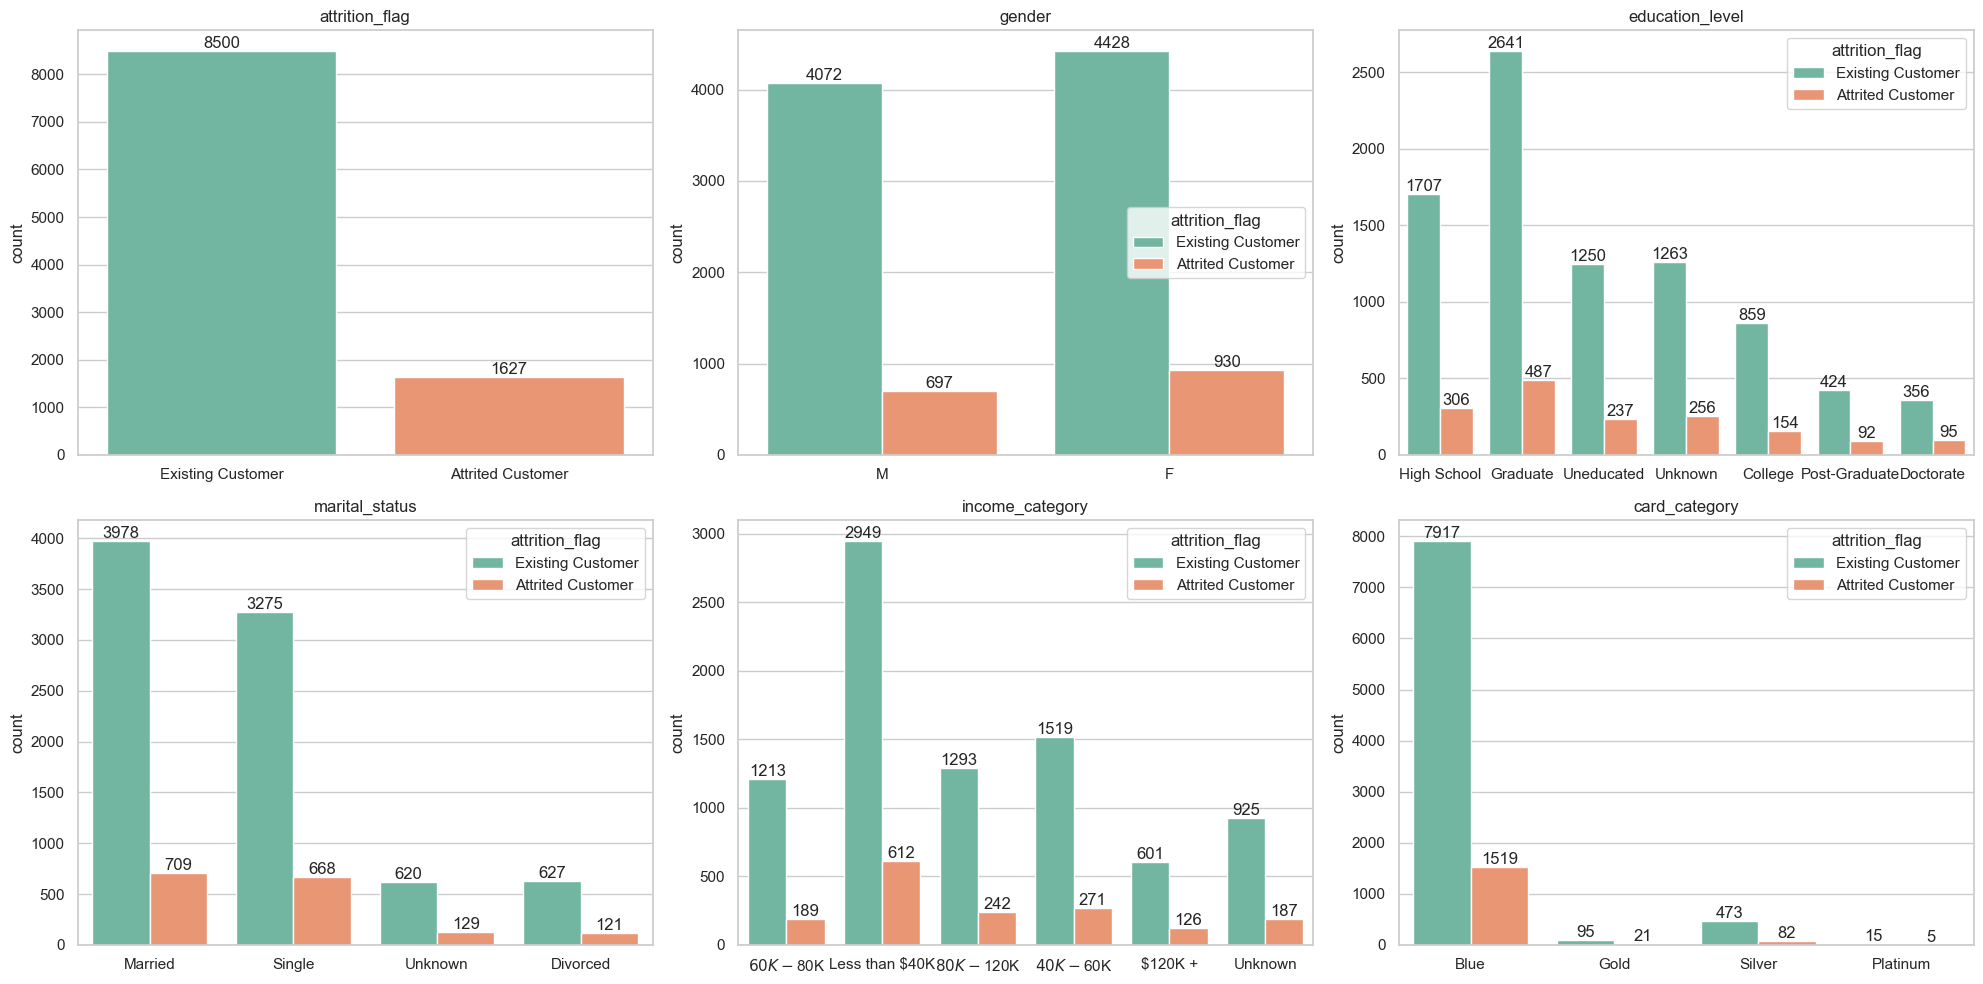

In [18]:
analysis_plots(df2, cat_cols, countplot=True, palette="Set2", hue=df2["attrition_flag"])

#### Insights

- More than 16% of the customers has departed or is about to leave the bank.
- Although there are somewhat more women than males among the company's clientele, total customer distribution is equal, even when attrition is taken into account.
- Out of the seven groups, the majority of customers completed their high school education or graduated. Furthermore, we have a minor issue with certain of our consumers whose educational worth is unclear.
- While the majority of clients are married, the singles are rather close. Similar to schooling, we have an issue with unidentified values.
- A minor percentage of the clients have unknown figures for their income, while the majority make less than $40,000.
- The majority of clients own the blue card category.

### Numerical Features

In [19]:
num_cols = df2.select_dtypes(exclude="object").columns.to_list()
num_cols

['customer_age',
 'dependent_count',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'credit_limit',
 'total_revolving_bal',
 'avg_open_to_buy',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio']

In [21]:
df2[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
total_relationship_count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
months_inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
contacts_count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
credit_limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
total_revolving_bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
avg_open_to_buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
total_amt_chng_q4_q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


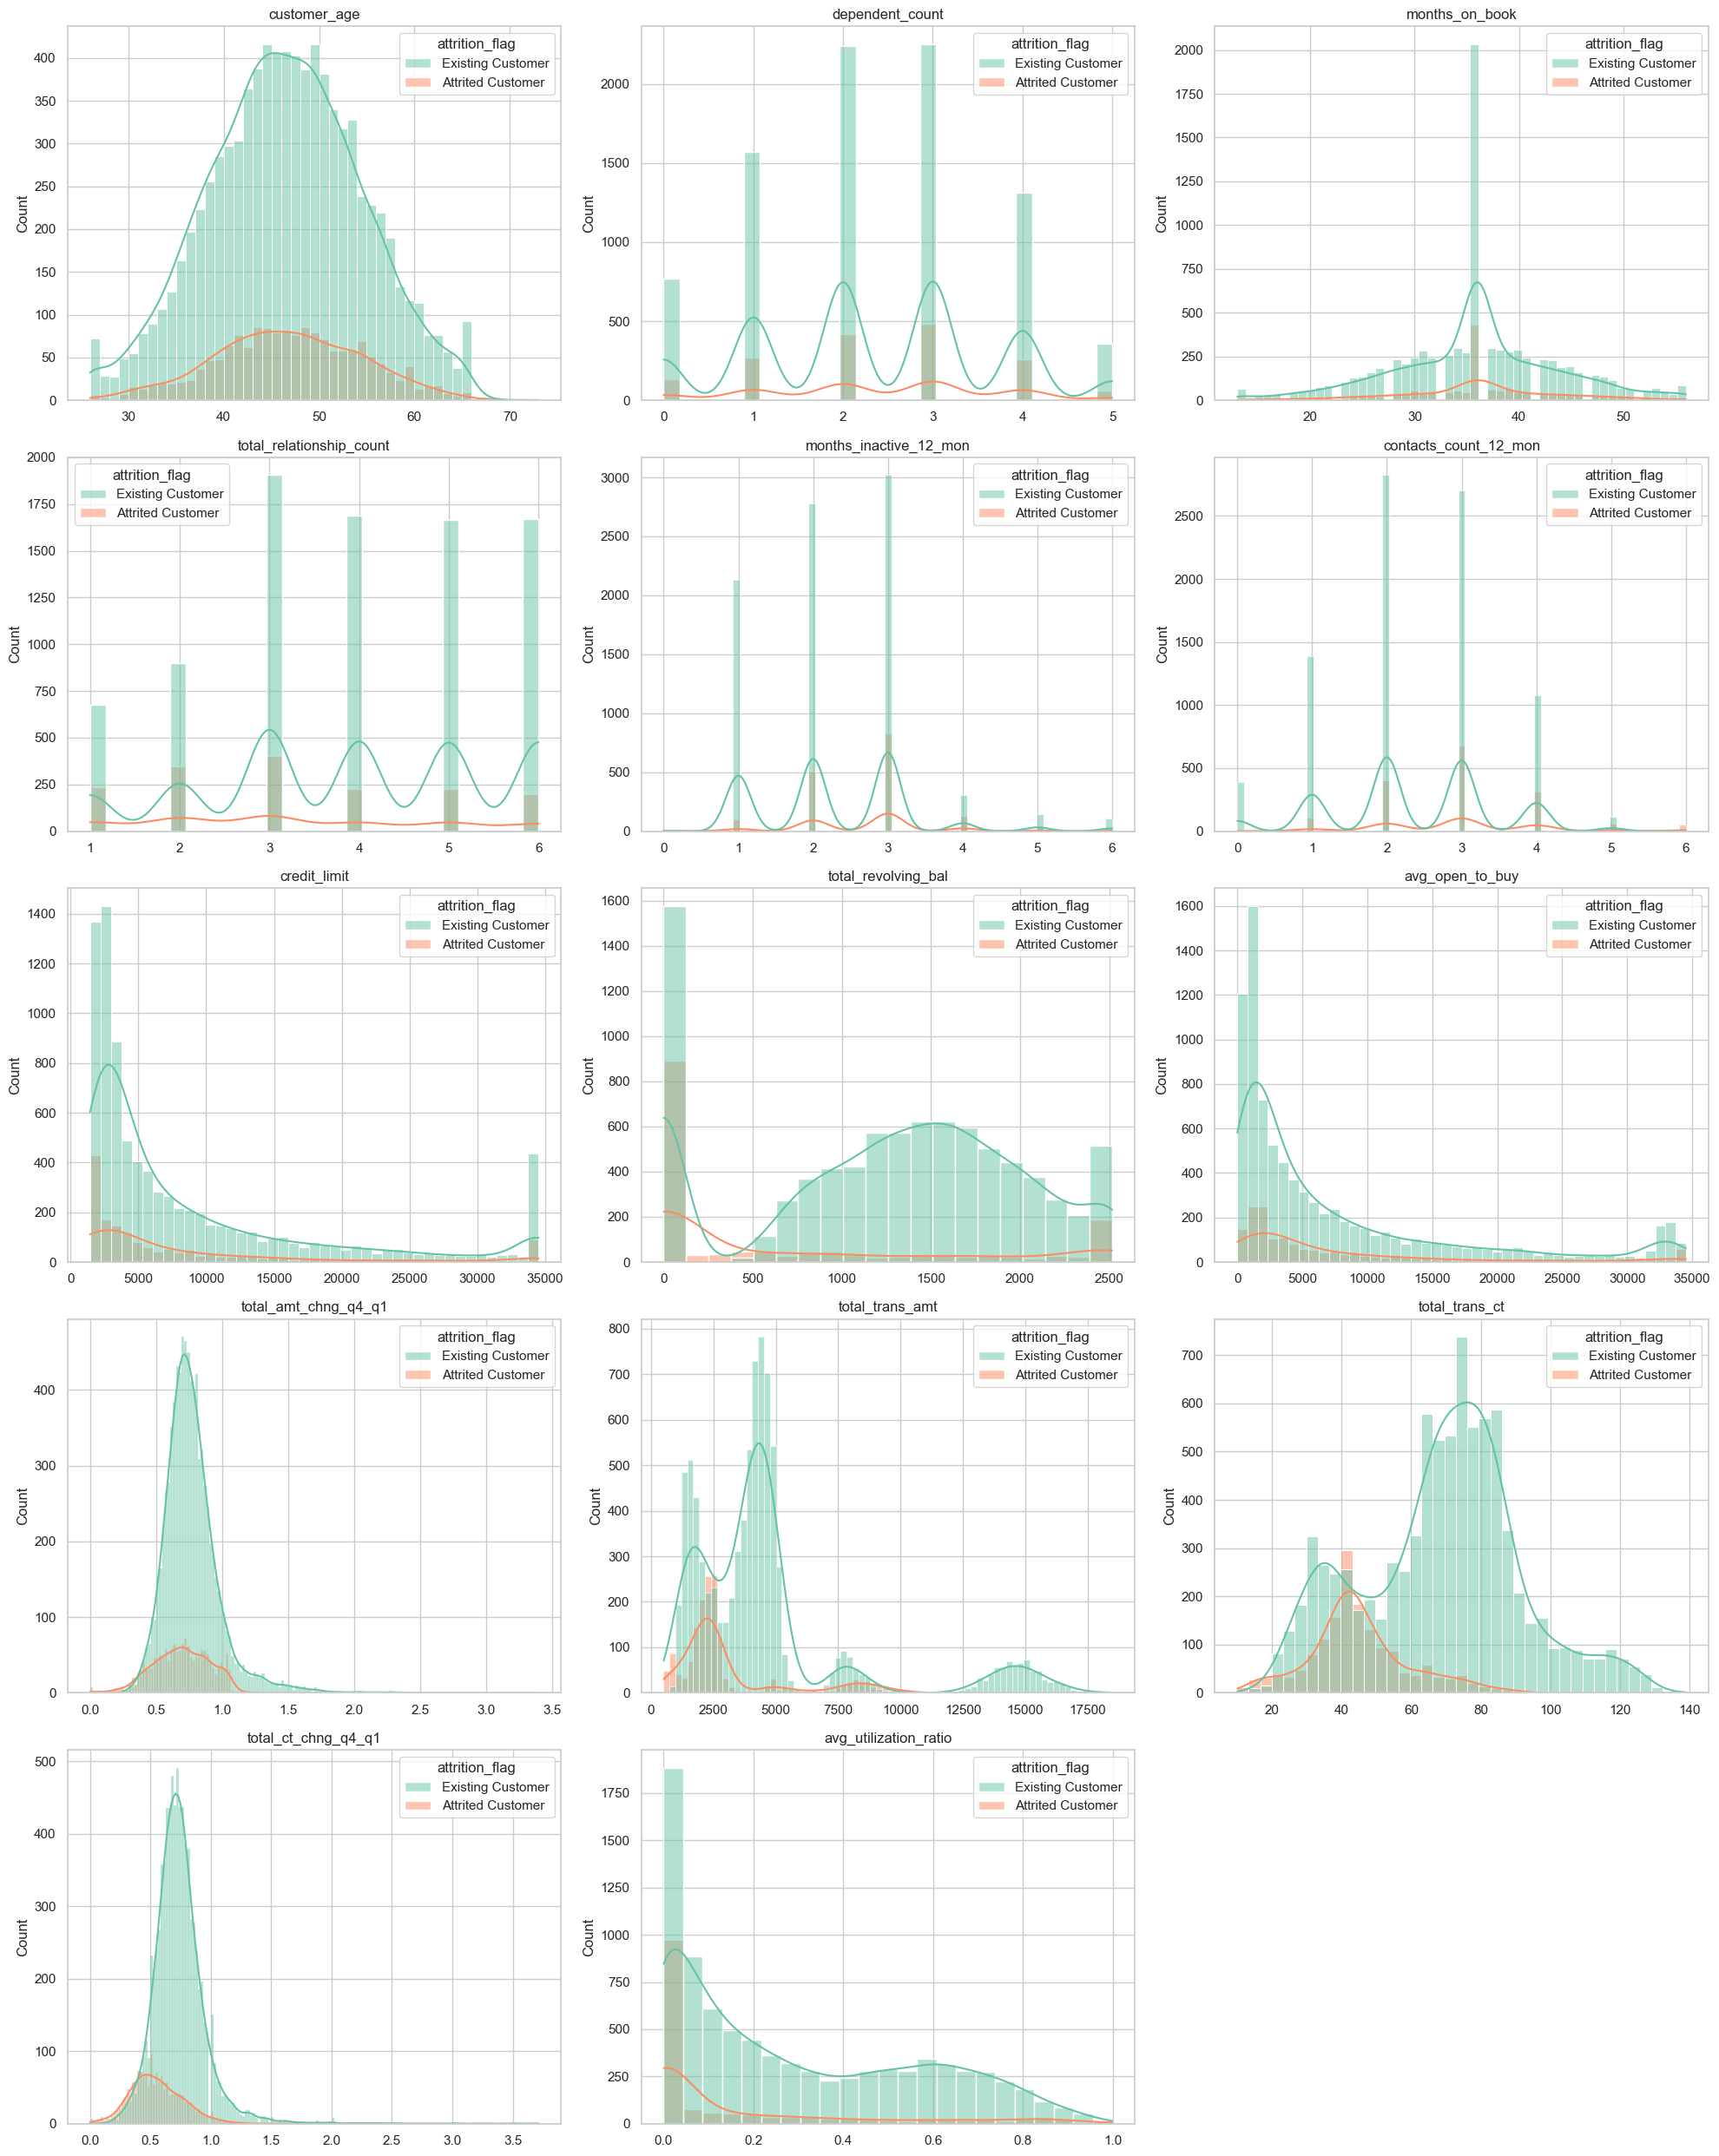

In [22]:
analysis_plots(df2, num_cols, histplot=True, palette="Set2", hue=df2["attrition_flag"], kde=True)

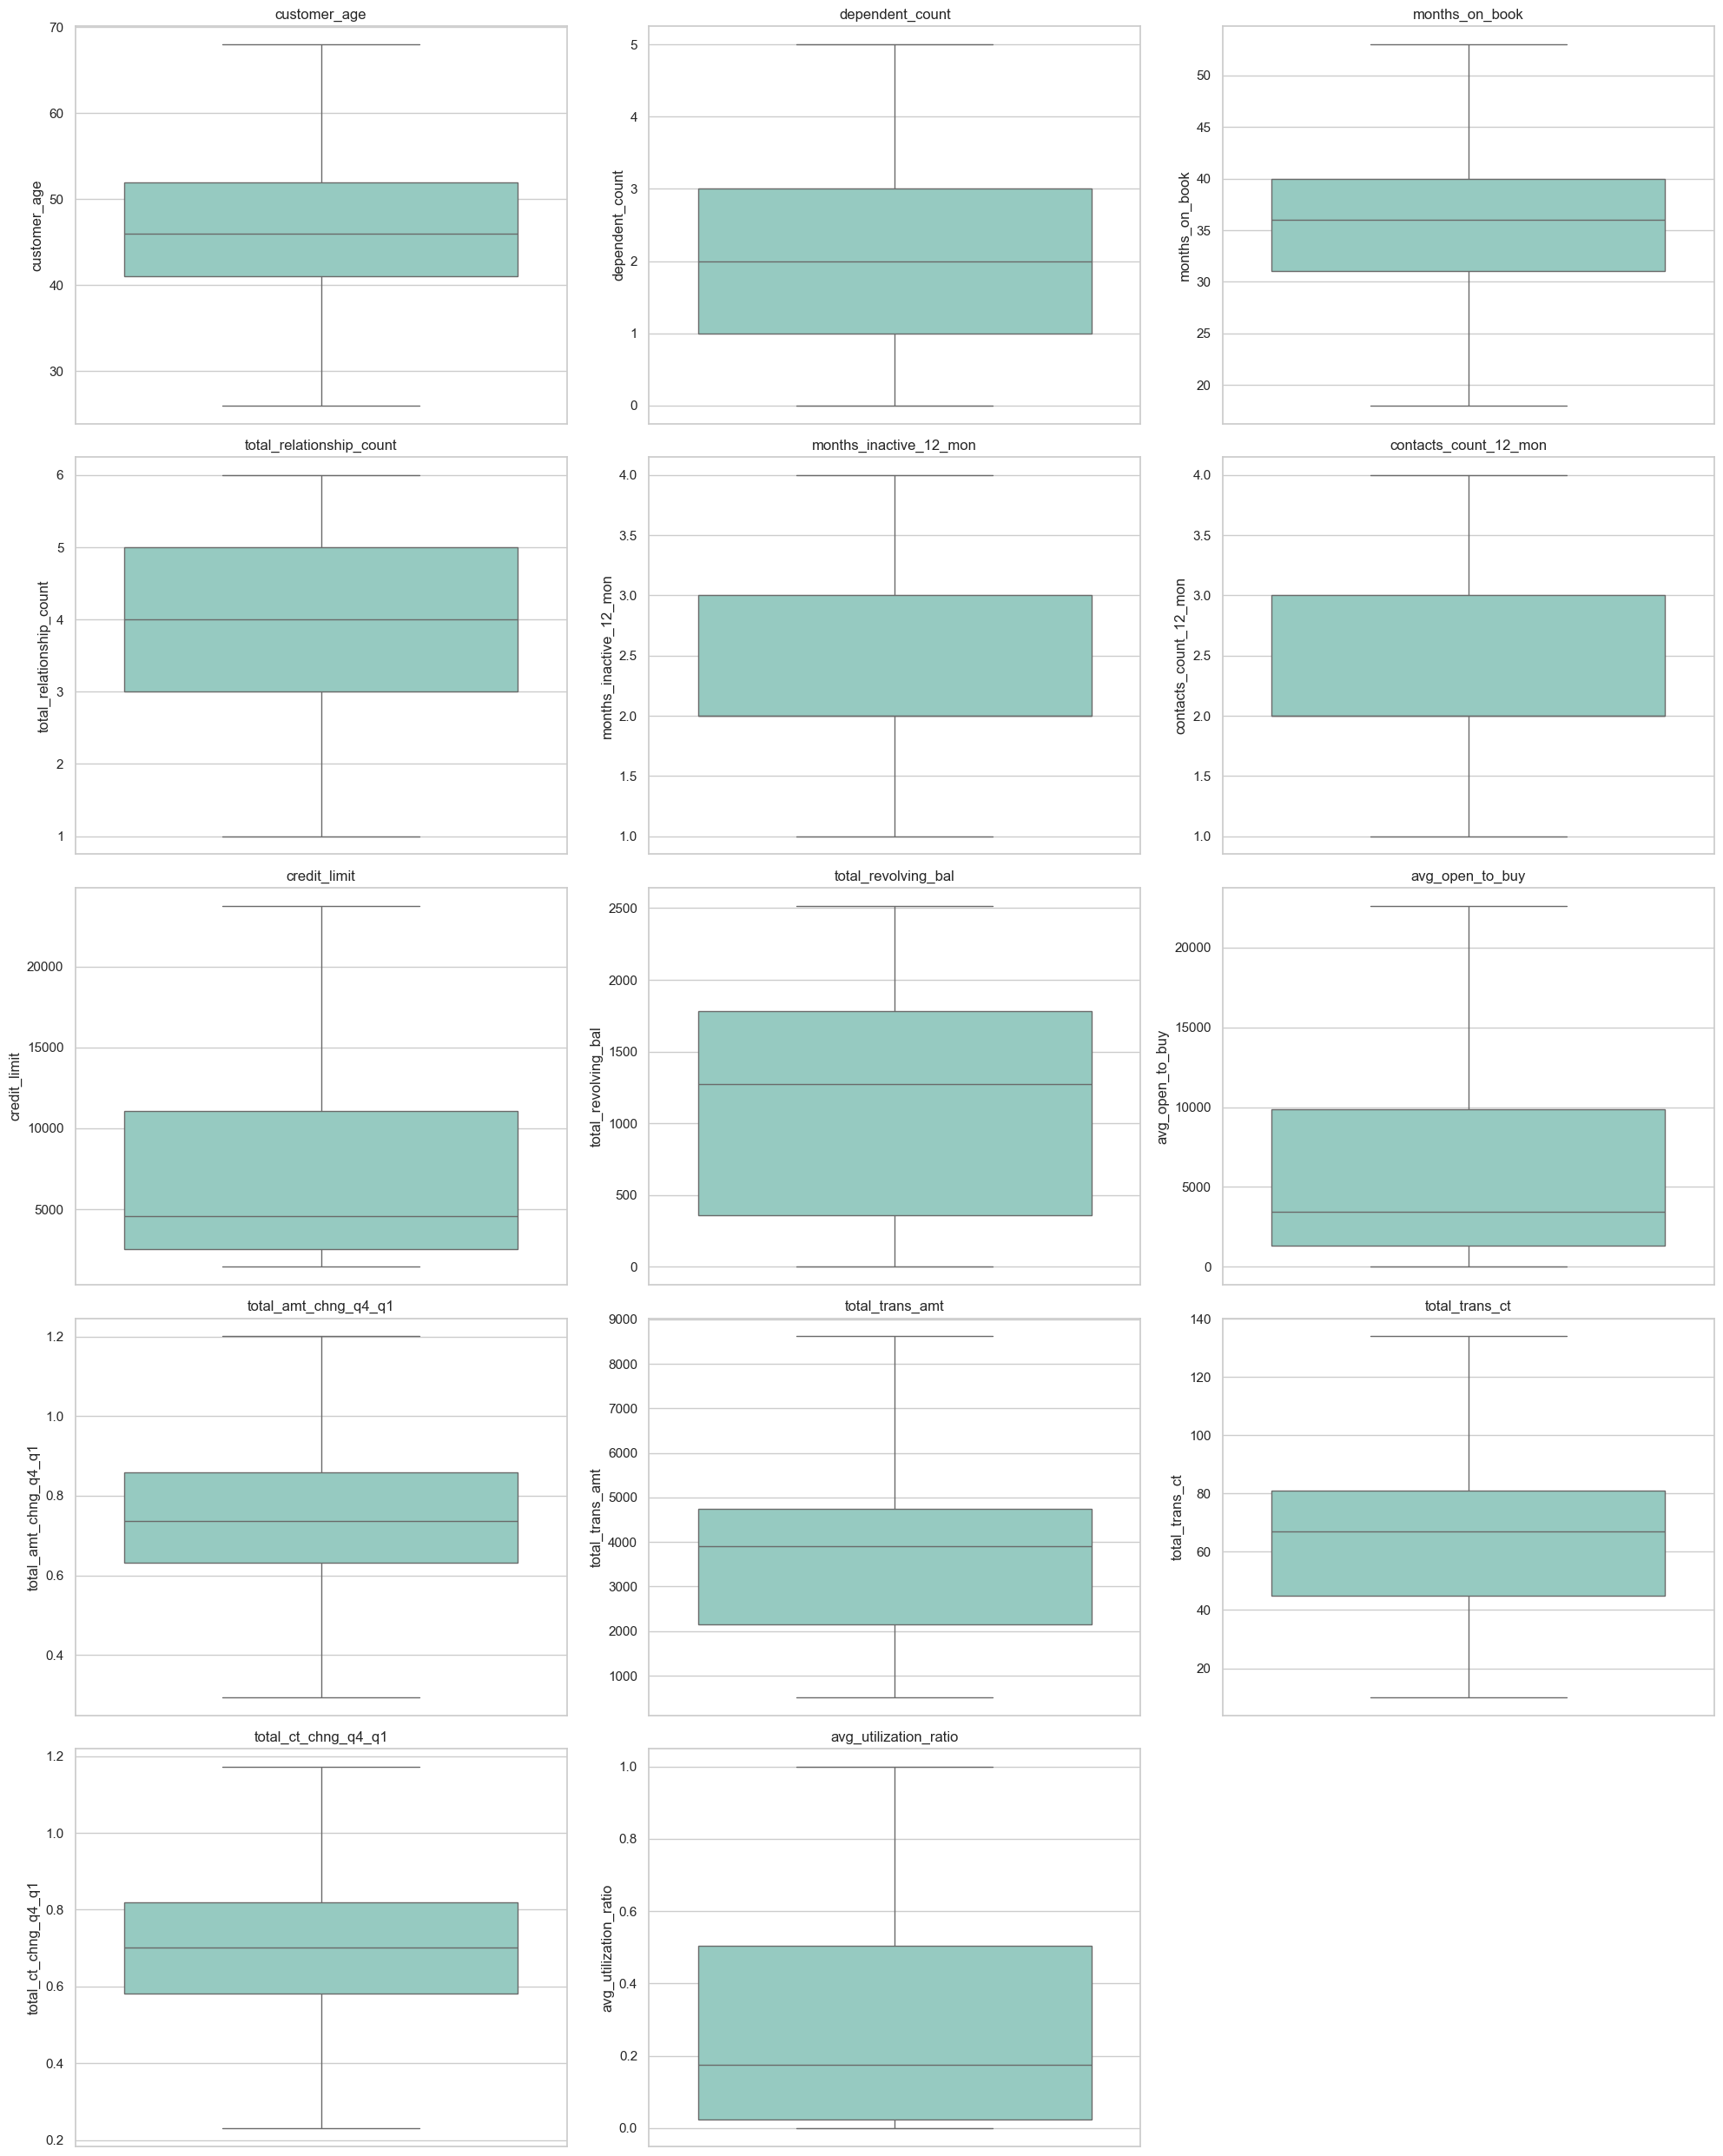

In [23]:
analysis_plots(df2, num_cols, boxplot=True, palette="Set3", hue=df2["attrition_flag"])

#### Insights

- The majority of the clientele is middle-aged, ranging from 40 to 50 years old.
- The majority of clients have one or more dependents, usually between two and three.
- The firm had a large number of new users 37 months ago.
- The majority of clients own three or more bank products.
- The majority of clients remain inactive for up to three months.
- The majority of clients make up to three or more contacts.
- While a sizable portion of the clientele have credit limits that are the highest possible, the majority have low credit limits. And, most of them still have available credit.
- The majority of clients have revolving credit.

### Correlation Matrix

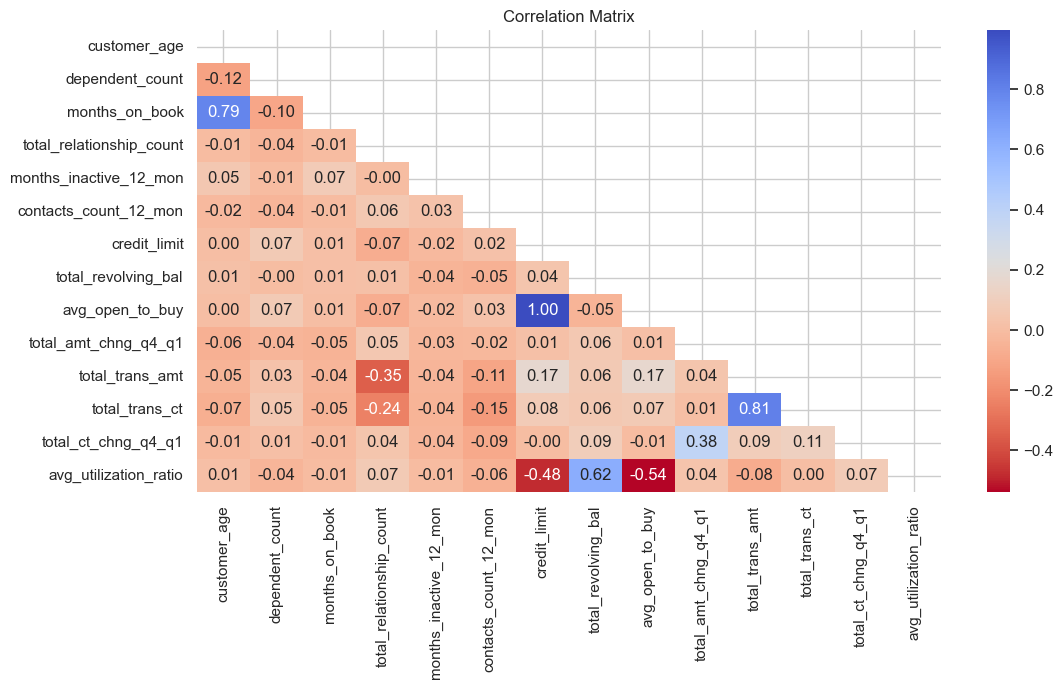

In [24]:
num_cols = df2.select_dtypes(exclude="object").columns.to_list()
corr_matrix = df2[num_cols].corr()
sns.set_style('whitegrid')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

#### Insights

- **Months on Book vs. Customer Age**. We observe a high positive correlation between these two variables because they are time-related. As customers age, the time since they first created an account with the bank increases.
- **Avg Open to Buy vs. Credit Limit**. There is a strong positive correlation between these variables because the average open to buy is directly dependent on the credit limit.
- **Total Transaction Amount vs. Total Transaction Count**. A high positive correlation exists between these two variables. This is because as the number of transactions increases, the total transaction amount also increases.
- **Total Transaction Amount vs. Total Relationship Count**. We find a slight negative correlation between these variables, indicating that customers with a high total transaction amount tend to have fewer bank products.
- **Total Transaction Count vs. Total Relationship Count**. There is a slight negative correlation here as well, suggesting that customers with a high transaction count tend to have fewer bank products. This is expected since the total transaction amount and count are strongly positively correlated.
- **Avg Utilization Ratio vs. Credit Limit**. There is a strong negative correlation between these variables, meaning that higher credit limits are associated with lower average utilization ratios.
- **Avg Utilization Ratio vs. Total Revolving Balance**. These two variables are strongly positively correlated, which makes sense because as a customer uses their credit card more, their revolving balances increase.
- **Avg Utilization Ratio vs. Avg Open to Buy**. We observe a high negative correlation, indicating that a higher average open to buy corresponds to a lower average utilization ratio.

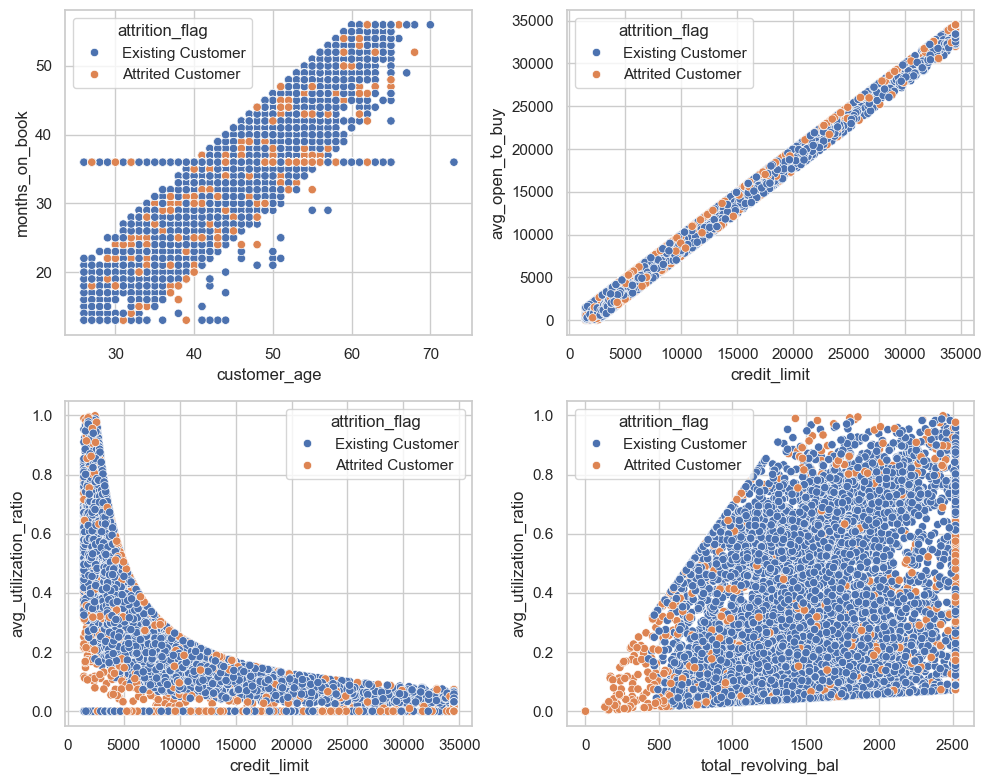

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.scatterplot(data=df2, x='customer_age', y='months_on_book', hue='attrition_flag', ax=axes[0, 0])
sns.scatterplot(data=df2, x='credit_limit', y='avg_open_to_buy',  hue='attrition_flag', ax=axes[0, 1])
sns.scatterplot(data=df2, x='credit_limit', y='avg_utilization_ratio',  hue='attrition_flag', ax=axes[1, 0])
sns.scatterplot(data=df2, x='total_revolving_bal', y='avg_utilization_ratio',  hue='attrition_flag', ax=axes[1, 1])
plt.tight_layout()
plt.show()

### Conclusion

- The bank must keep an eye on the dispersion of the average utilisation ratio. Being right-skewed means that most users don't utilise the service very often. In instance, almost 25% of them have a 0% utilisation ratio. The company must thus create strategies to increase utilisation and, consequently, revenue.
- In the previous 12 months, 90% of the consumers were inactive for one to three months. The bank needs to develop plans to prevent consumer idleness in addition to raising the utilisation percentage.
- 75% of the clients had at least two encounters with the bank in the preceding year. The bank has to be aware of this and enquire as to why customers are calling. Do they have grievances with the credit card provider? If yes, what specific problem is causing them to be unhappy? In proportion to the total number of bank contacts, the churn rate rises monotonically and progressively. Particularly, all customers who made six contacts departed.
- Consumers that leave the company frequently have reduced credit limits, revolving debt, transaction amounts, transaction counts, and average utilisation ratios (many of them have 0% utilisation rates). This makes perfect sense because a customer will do fewer transactions and hence have lower values of these traits when he is ready to stop using the service.

In [26]:
df2.to_csv('dataset_churn_clean.csv', index=False)